# Customer Churn Pattern Analysis and Visualization
## Introduction
Customer churn refers to the phenomenon where customers stop doing business with a company or service. It is a critical metric for companies, especially those operating in highly competitive markets like telecommunications. Understanding the reasons behind customer churn and identifying patterns can help organizations retain valuable customers, reduce revenue loss, and improve overall service.
In this analysis, we use the Telco Customer Churn dataset, which includes information about customer demographics, account details, and service usage. The goal is to explore the dataset, analyze the distribution of churn, and uncover insights through visualizations and statistical summaries. This exploratory data analysis (EDA) sets the foundation for building predictive models to identify customers who are likely to churn in the future.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Python libraries for data manipulation (pandas, numpy) and data visualization (matplotlib, seaborn) with inline plotting enabled

In [3]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


loads the Telco Customer Churn dataset from a CSV file into a DataFrame named df using pandas.

In [5]:
print("First 5 Rows:")
df.head()

First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 displays the total number of missing (null) values in each column of the DataFrame df.

In [9]:
print("\nDescriptive Statistics:")
df.describe(include='all')


Descriptive Statistics:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


provides descriptive statistics for all columns in the DataFrame df, including both numerical and categorical data.

In [11]:
print("\nData Types:")
df.dtypes


Data Types:


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

displays the data type of each column in the DataFrame df.

In [13]:
print("\nChurn Value Counts:")
df['Churn'].value_counts()


Churn Value Counts:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

counts and displays the number of occurrences of each unique value in the 'Churn' column, showing how many customers have churned vs. not churned.

C:\Users\hg757\AppData\Local\Temp\ipykernel_59340\106819436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


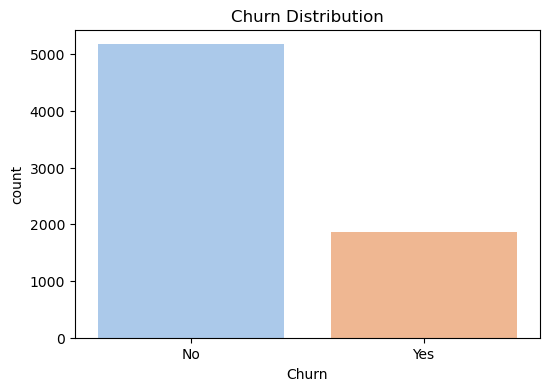

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Churn Distribution")
plt.show()

The chart reveals that a significantly larger number of customers did not churn (No) compared to those who did churn (Yes), indicating class imbalance in the dataset.This visualization is useful for understanding the target variable before building any predictive models.

In [17]:
# Percentage Distribution
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Percentage:")
print(churn_percent)


Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


This helps quantify class imbalance in percentage terms.

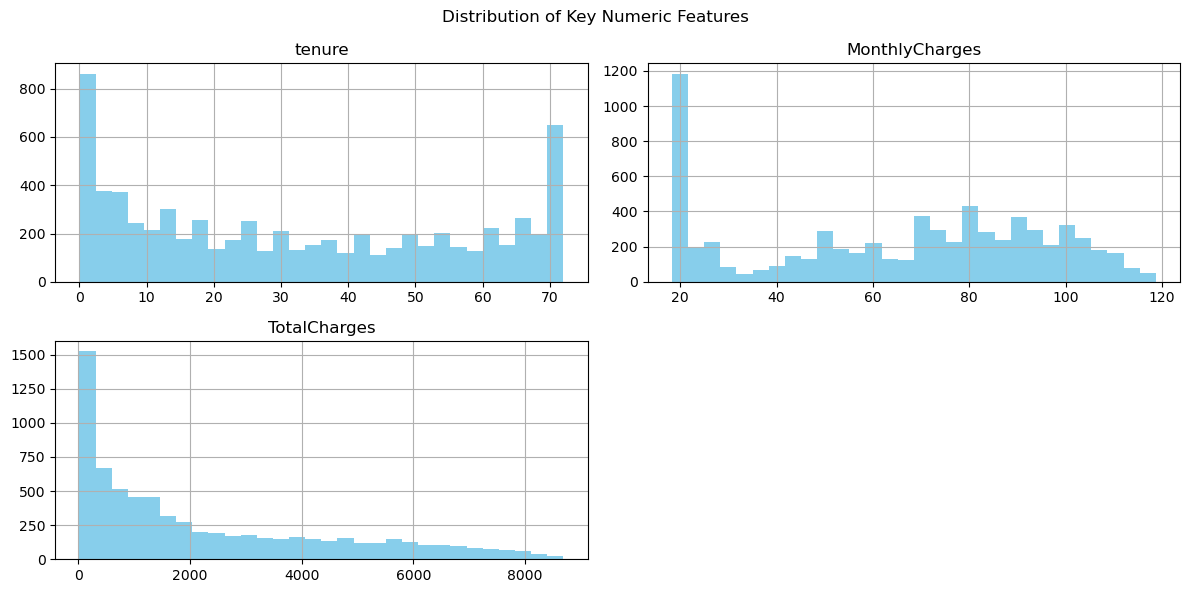

In [19]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')  # Ensure numeric type

df[numeric_features].hist(figsize=(12, 6), bins=30, color='skyblue')
plt.suptitle("Distribution of Key Numeric Features")
plt.tight_layout()
plt.show()


These plots help in understanding data skewness and distribution before applying transformations or models.This image displays histograms showing the distribution of key numeric features from the Telco Customer Churn dataset

C:\Users\hg757\AppData\Local\Temp\ipykernel_59340\3152101127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')


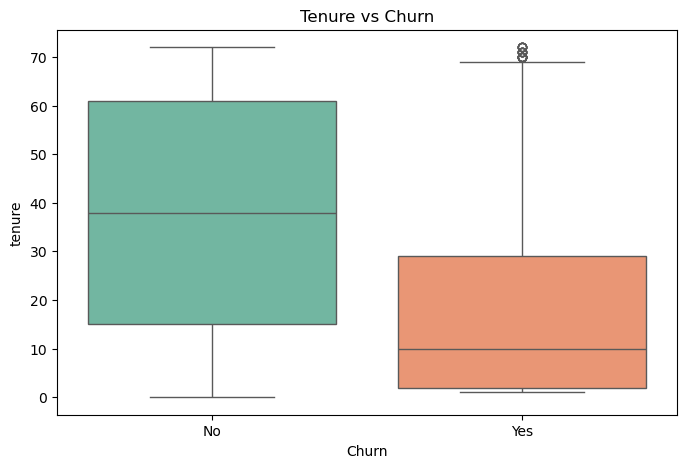

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure vs Churn')
plt.show()


This box plot shows the relationship between tenure (length of customer relationship) and churn status

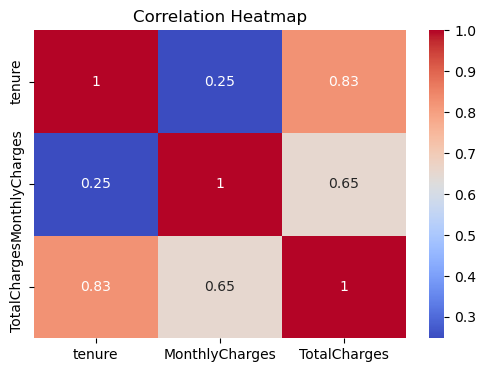

In [23]:
corr = df[numeric_features].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


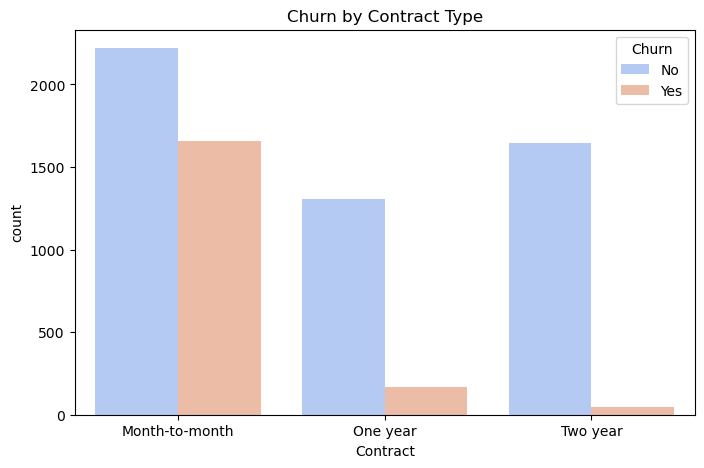

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

In [27]:
# Churn Rate for Each Contract Type
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Contract Type (%):")
print(churn_by_contract)


Churn Rate by Contract Type (%):
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


## Conclusion
The exploratory data analysis of the Telco Customer Churn dataset provided meaningful insights into customer behavior and churn patterns. Key findings include:

- The dataset contains several categorical and numerical features, with tenure, MonthlyCharges, and TotalCharges showing strong relevance to churn.
- Churned customers tend to have shorter tenures, indicating that early intervention strategies may help improve retention.
- Customers on month-to-month contracts are more likely to churn compared to those on longer-term contracts.
- The churn rate was visualized and compared across various features, highlighting potential areas for targeted customer engagement.

This analysis highlights the importance of understanding customer characteristics and service usage in predicting churn. These insights can guide business decisions and lay the groundwork for building machine learning models to proactively manage customer retention.